In [1]:
# Kernal allow us easily explore linear regression in the feature space 
# usually with higher diamension, amounting to infinity
# as performing non-linear regression in input space
# while feature function could be implict
# kernal trick take the advance of ridge regression where everything is 
# conducting in inner product between training points and inference between 
# triaing point and test point, which significantly saves computation
# Gaussian kernal's feature function maps input point into space with 
# infinite diamension 

In [2]:
# exercise 8
import scipy.io
import numpy as np
boston = scipy.io.loadmat('boston.mat')

In [3]:
boston.keys()

dict_keys(['__header__', '__globals__', '__version__', 'boston'])

In [4]:
data = boston['boston']

In [5]:
# get all feature as feature set
feature = data[:,:data.shape[1]-1] # first 13 column as feature

In [6]:
# get target set
target = data[:,-1]

In [7]:
from sklearn.utils import shuffle

In [8]:
def data_prep(feature, target):
    x,y = shuffle(feature, target)
    num_train = 2 * int(x.shape[0] / 3)
    train_feature = x[:num_train]
    train_target = y[:num_train]
    test_feature = x[num_train:]
    test_target = y[num_train:]
    return train_feature, train_target, test_feature, test_target

In [9]:
# calculate square error from error
def error2MSE(err):
    return err @ err / len(err)

In [10]:
# exercise 9
# (a)
# Using naive regression, by taking derivative, we know the constant should 
# the mean of of y
def naive_regression(train_target, test_target):
    num_train = train_target.shape[0]
    const = np.sum(train_target) / num_train
    train_predict = const * np.ones_like(train_target)
    test_predict = const * np.ones_like(test_target)
    train_error = train_target - train_predict
    test_error = test_target - test_predict
    MSE_train = error2MSE(train_error)
    MSE_test = error2MSE(test_error)
    return MSE_train, MSE_test
    print("Naive_MSE_train:", MSE_train)
    print("Naive_MSE_test:", MSE_test)

In [11]:
# calculate mean and sigma
def mean_var(val_list):
    m = np.sum(val_list) / len(val_list)
    s = (np.array(val_list) - m) @ (np.array(val_list) - m) / len(val_list)
    return m, np.sqrt(s)
    

In [12]:
#(a) section for naive regression
naive_mse_train = []
naive_mse_test = []
for i in range(20):
    train_feature, train_target, test_feature, test_target  = data_prep(feature, target)
    MSE_train, MSE_test = naive_regression(train_target, test_target)
    naive_mse_train.append(MSE_train)
    naive_mse_test.append(MSE_test)
print(mean_var(naive_mse_train))
print(mean_var(naive_mse_test))

(84.647643176020409, 5.2764621106859106)
(84.156627412214888, 10.364822506862712)


In [13]:
#(b) section for single attribute
def single_lse(x,y):
    mean_x = np.sum(x) / len(x)
    mean_y = np.sum(y) / len(y)
    w = ((y - mean_y) @ x) / ((x - mean_x) @ x)
    b = mean_y - w * mean_x
    return w, b

In [14]:
from collections import defaultdict


In [15]:
att_num = train_feature.shape[1]
attr_train_error_dict = defaultdict(list)
attr_test_error_dict = defaultdict(list)
for r in range(20):
    train_feature, train_target, test_feature, test_target  = data_prep(feature, target)
    for i in range(att_num):
        train_att = train_feature[:,i]
        test_att = test_feature[:,i]
        w, b = single_lse(train_att, train_target)
        train_error = train_target - (train_att * w + b)
        MSE_train = error2MSE(train_error)
        test_error = test_target - (test_att * w + b)
        MSE_test = error2MSE(test_error)
        attr_train_error_dict[i].append(MSE_train)
        attr_test_error_dict[i].append(MSE_test)
        print("att_" + str(i))
        print("single_att_MSE_train:", MSE_train)
        print("single_att_MSE_test:", MSE_test)

att_0
single_att_MSE_train: 69.812763628
single_att_MSE_test: 76.4141719114
att_1
single_att_MSE_train: 72.4664405101
single_att_MSE_test: 75.767058578
att_2
single_att_MSE_train: 61.1395741361
single_att_MSE_test: 71.9657590461
att_3
single_att_MSE_train: 79.6906384455
single_att_MSE_test: 86.4808043261
att_4
single_att_MSE_train: 67.2086781859
single_att_MSE_test: 72.875077333
att_5
single_att_MSE_train: 46.467659506
single_att_MSE_test: 39.466562106
att_6
single_att_MSE_train: 71.71748753
single_att_MSE_test: 74.5122136906
att_7
single_att_MSE_train: 76.7234371464
single_att_MSE_test: 84.4445455889
att_8
single_att_MSE_train: 68.5316023011
single_att_MSE_test: 79.9187526499
att_9
single_att_MSE_train: 60.5945278363
single_att_MSE_test: 77.0544089173
att_10
single_att_MSE_train: 58.647906352
single_att_MSE_test: 70.9596828827
att_11
single_att_MSE_train: 70.4637426948
single_att_MSE_test: 84.2605131942
att_12
single_att_MSE_train: 38.2844834431
single_att_MSE_test: 39.266023048
att_0

single_att_MSE_test: 62.929529021
att_12
single_att_MSE_train: 40.1574551723
single_att_MSE_test: 35.4423734547
att_0
single_att_MSE_train: 79.1781634519
single_att_MSE_test: 58.1115232996
att_1
single_att_MSE_train: 81.3558019887
single_att_MSE_test: 58.1501906556
att_2
single_att_MSE_train: 70.8235396365
single_att_MSE_test: 52.868057024
att_3
single_att_MSE_train: 90.6180545675
single_att_MSE_test: 65.0501470263
att_4
single_att_MSE_train: 77.7374183777
single_att_MSE_test: 52.1422369696
att_5
single_att_MSE_train: 41.862706672
single_att_MSE_test: 48.3249478449
att_6
single_att_MSE_train: 80.4274853396
single_att_MSE_test: 57.2341353646
att_7
single_att_MSE_train: 88.5551352429
single_att_MSE_test: 61.3110872193
att_8
single_att_MSE_train: 78.2027884153
single_att_MSE_test: 60.7642935053
att_9
single_att_MSE_train: 71.0211989928
single_att_MSE_test: 56.3216586519
att_10
single_att_MSE_train: 62.5147938951
single_att_MSE_test: 65.8570020765
att_11
single_att_MSE_train: 84.5477429619

In [16]:
# the result for every attribute
for w in attr_test_error_dict.items():
    print("attr",w[0])
    print("mean_sig", mean_var(w[1]))

attr 0
mean_sig (70.560559581351768, 9.3635427838246521)
attr 1
mean_sig (71.309402553709546, 8.0219148930040554)
attr 2
mean_sig (62.100582693336584, 10.560253903795852)
attr 3
mean_sig (80.825118034917296, 10.265476211635045)
attr 4
mean_sig (66.300559903301775, 9.9047660834634659)
attr 5
mean_sig (43.078906472768061, 6.9103325047003672)
attr 6
mean_sig (70.164537094577241, 9.4872387169939785)
attr 7
mean_sig (76.935860311840372, 10.060538200206915)
attr 8
mean_sig (70.209022105711426, 10.263572327149923)
attr 9
mean_sig (63.886013882794927, 10.533603346043442)
attr 10
mean_sig (62.843123869762636, 7.198443405199674)
attr 11
mean_sig (73.243954708449166, 10.234002225343279)
attr 12
mean_sig (37.696177930724822, 4.7268242938062146)


In [17]:
# (c) all attributes
# using ridge regression with adding a bias term

def ridgereg(fea_mtx, y_label, regu, num_p):
    return np.linalg.inv((fea_mtx.transpose() @ fea_mtx + regu * num_p * np.identity(fea_mtx.shape[1]))) @ fea_mtx.transpose() @ y_label
    

In [18]:
all_attr_train_error = []
all_attr_test_error = []

for i in range(20):
    train_feature, train_target, test_feature, test_target  = data_prep(feature, target)
    col_bias = np.ones((train_feature.shape[0],1))
    tf_with_bias = np.concatenate((train_feature,col_bias),axis = 1)
    w = ridgereg(tf_with_bias, train_target, 1e-3, len(train_target))
    train_error = train_target - tf_with_bias @ w
    MSE_trian = error2MSE(train_error)
    test_bias_col = np.ones((test_feature.shape[0],1))
    test_f_with_bias = np.concatenate((test_feature,test_bias_col),axis=1)
    test_error = test_target - test_f_with_bias @ w
    MSE_test = error2MSE(test_error)
    all_attr_train_error.append(MSE_train)
    all_attr_test_error.append(MSE_test)
    print("all_att_train_MSE", MSE_train)
    print("all_att_test_MSE", MSE_test)


all_att_train_MSE 38.2461067205
all_att_test_MSE 23.9406171429
all_att_train_MSE 38.2461067205
all_att_test_MSE 27.6372114882
all_att_train_MSE 38.2461067205
all_att_test_MSE 25.7909518909
all_att_train_MSE 38.2461067205
all_att_test_MSE 29.1416746016
all_att_train_MSE 38.2461067205
all_att_test_MSE 25.9321994097
all_att_train_MSE 38.2461067205
all_att_test_MSE 30.7659464682
all_att_train_MSE 38.2461067205
all_att_test_MSE 18.4700599104
all_att_train_MSE 38.2461067205
all_att_test_MSE 22.499477199
all_att_train_MSE 38.2461067205
all_att_test_MSE 21.6072286001
all_att_train_MSE 38.2461067205
all_att_test_MSE 18.2557396391
all_att_train_MSE 38.2461067205
all_att_test_MSE 16.3934709407
all_att_train_MSE 38.2461067205
all_att_test_MSE 27.7589774794
all_att_train_MSE 38.2461067205
all_att_test_MSE 22.3254525215
all_att_train_MSE 38.2461067205
all_att_test_MSE 19.0880411341
all_att_train_MSE 38.2461067205
all_att_test_MSE 24.2157171574
all_att_train_MSE 38.2461067205
all_att_test_MSE 24.5787

In [19]:
mean_var(all_attr_test_error)

(24.372022453416061, 4.674908097476691)

In [20]:
train_error = train_target - tf_with_bias @ w
MSE_trian = error2MSE(train_error)
test_bias_col = np.ones((test_feature.shape[0],1))
test_f_with_bias = np.concatenate((test_feature,test_bias_col),axis=1)
test_error = test_target - test_f_with_bias @ w
MSE_test = error2MSE(test_error)
print("all_att_train_MSE", MSE_train)
print("all_att_test_MSE", MSE_test)

all_att_train_MSE 38.2461067205
all_att_test_MSE 36.3310056309


In [21]:
def kridgereg(kernal_matrix, y, r):
    # y is train label
    # r is regulazor
    # return the dual weight vector alpha
    # where w = X' * alpha
    dia = len(y)
    n = kernal_matrix.shape[0] # num of data points
    return np.linalg.inv(kernal_matrix + n * r * np.identity(dia)) @ y

In [22]:
def dualcost(kernal_matrix, y, dual_a):
    # the square error of test set
    # given the kernal matrix by kernal funtion between
    # test set matrix and train_set matrix -- K(test,train)
    error = kernal_matrix @ dual_a - y
    return error @ error / len(error)

In [23]:
def gaussian_function(x,x_,sig):
    dis = (x - x_) @ (x - x_)
    return np.exp(-dis/(2* sig ** 2))

In [24]:
def gaussian_kernal(matrx_1, matrx_2, sig):
    # with size row of m_1 col of m2
    gaus_kernal = np.zeros((matrx_1.shape[0], matrx_2.shape[1]))
    for i in range(matrx_1.shape[0]):
        for j in range(matrx_2.shape[1]):
            gaus_kernal[i,j] = gaussian_function(matrx_1[i], matrx_2[:,j], sig)
    return gaus_kernal


In [25]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
regs = []
sigs = []
costs = []
# use the best r and sigma
for r in range(26,40):
    for sig in np.arange(7,13.5,0.5):
        regs.append(r)
        sigs.append(sig)
        # kern is the kernal for train data
        kern = gaussian_kernal(train_feature, train_feature.transpose(), 2**sig)
        dual_a = kridgereg(kern, train_target, 2**(-r))
        test_kern = gaussian_kernal(test_feature, train_feature.transpose(), 2**sig)
        costs.append(dualcost(test_kern, test_target, dual_a))
    #plt.plot(sig_set, cost_set)
    #plt.title("r:" + str(r) + " sig:" + str(sig))
    #plt.show()
    

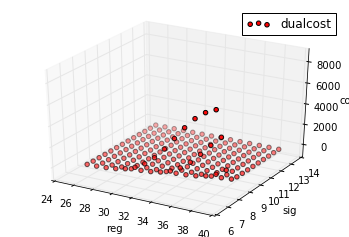

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(regs,sigs,costs, c='r',marker='o', label="dualcost")
ax.set_xlabel('reg')
ax.set_ylabel('sig')
ax.set_zlabel('cost')
plt.legend()
plt.show()

In [27]:
# get the best r and sigma
m = np.argmin(costs)
reg = regs[m]
sig = sigs[m]
reg,sig

(39, 11.0)

In [28]:
best_sig = 9.0
best_reg = 27
kernal_train_error = []
kernal_test_error = []
for i in range(20):
    train_feature, train_target, test_feature, test_target  = data_prep(feature, target)
    kern = gaussian_kernal(train_feature, train_feature.transpose(), 2**best_sig)
    dual_a = kridgereg(kern, train_target, 2**(-best_reg))
    test_kern = gaussian_kernal(test_feature, train_feature.transpose(), 2**best_sig)
    test_MSE = dualcost(test_kern, test_target, dual_a)
    train_MSE = dualcost(kern, train_target, dual_a)
    kernal_train_error.append(train_MSE)
    kernal_test_error.append(test_MSE)
    print("kernal_ridge_train_MSE", train_MSE)
    print("kernal_ridge_test_MSE", test_MSE)

kernal_ridge_train_MSE 6.23705969478
kernal_ridge_test_MSE 15.4351534559
kernal_ridge_train_MSE 7.79683635161
kernal_ridge_test_MSE 23.4524611347
kernal_ridge_train_MSE 7.27839696577
kernal_ridge_test_MSE 14.0391875634
kernal_ridge_train_MSE 8.65574384209
kernal_ridge_test_MSE 8.48093363568
kernal_ridge_train_MSE 6.87059300839
kernal_ridge_test_MSE 18.0084018391
kernal_ridge_train_MSE 7.60403799635
kernal_ridge_test_MSE 26.2906090865
kernal_ridge_train_MSE 8.01628621217
kernal_ridge_test_MSE 10.6345127515
kernal_ridge_train_MSE 7.95617181463
kernal_ridge_test_MSE 11.6514959817
kernal_ridge_train_MSE 6.92397411905
kernal_ridge_test_MSE 13.3478314086
kernal_ridge_train_MSE 8.53730187661
kernal_ridge_test_MSE 9.68302671803
kernal_ridge_train_MSE 6.45038106727
kernal_ridge_test_MSE 16.9769586663
kernal_ridge_train_MSE 7.01878856766
kernal_ridge_test_MSE 13.8252696527
kernal_ridge_train_MSE 6.92780012096
kernal_ridge_test_MSE 13.0243917372
kernal_ridge_train_MSE 8.1409083962
kernal_ridge_te

In [29]:
mean_var(kernal_test_error)

(14.409429683309458, 4.2965062036324113)